In [47]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Importing the dataset

dataset = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [49]:
# Lets look at the top 5 rows
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [50]:
# Checking for null values
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

[0.09704923 0.02752356 0.07972771 0.03337924 0.13061586 0.02173045
 0.07160482 0.1188119  0.08729689 0.02801794 0.02816782 0.27607457]


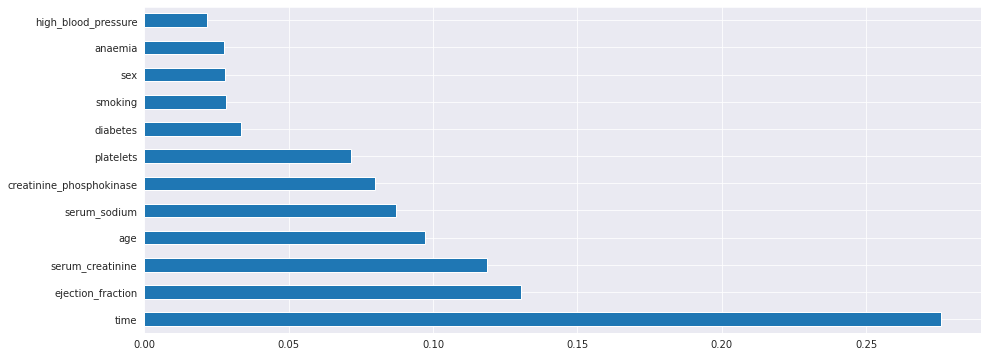

In [51]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [52]:
# We will select only 3 features : time, ejection_fraction, serum_creatinine

-----

Finding outliers

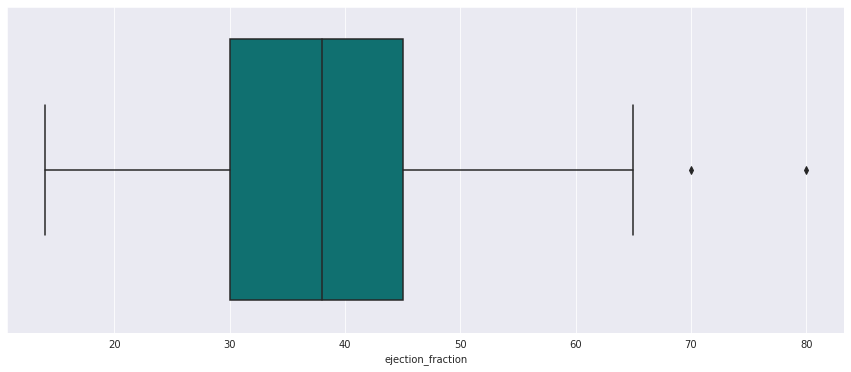

In [53]:
# Boxplot for ejection_fraction

sns.boxplot(x = dataset.ejection_fraction, color = 'teal')
plt.show()

In [54]:
# We can see there are two outliers. Lets remove them

In [55]:
dataset[dataset['ejection_fraction']>=70]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


In [56]:
dataset = dataset[dataset['ejection_fraction']<70]

In [57]:
# Finding outliers in time

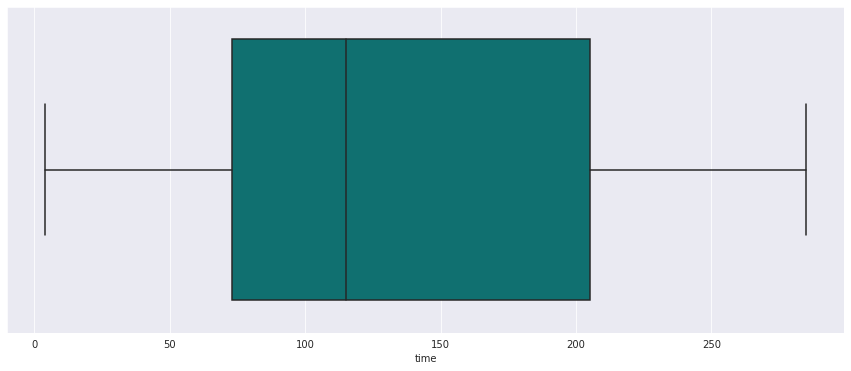

In [58]:
sns.boxplot(x=dataset.time, color = 'teal')
plt.show()

In [59]:
# No outliers in time.

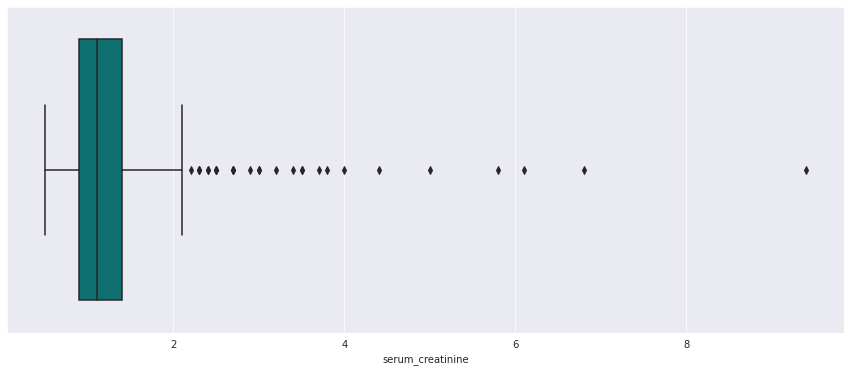

In [60]:
# Boxplot for ejection_fraction
sns.boxplot(x=dataset.serum_creatinine, color = 'teal')
plt.show()

In [61]:
# Before dealing with outliers we require knowledge about the outlier, the dataset and possibly some domain knowledge.
# Removing outliers without a good reason will not always increase accuracy. Without a deep understanding of what are the possible ranges that
# exist within each feature, removing outliers becomes tricky.

# When I researched a bit I found that all the values in serum_creatinine falls in possible range of values. So they are not outliers. 
# They are actual data points that helps in predicting DEATH_EVENT. 

LETS GET SOME INSIGHTS OF THE DATASET

In [62]:
# Distribution of Age

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['age'],
    xbins=dict( # bins used for histogram
        start=40,
        end=95,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='AGE DISTRIBUTION',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [63]:
# Hover over the graph to get the count of people of different age groups 

In [64]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="age", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns, 
                   title ="Distribution of AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

<div class="alert alert-block alert-info">
Wider sections of the violin plot represent a higher probability of observations taking a given value, the thinner sections correspond 
to a lower probability and the value of probability is given by kde value for given x
</div>

In [65]:
# Similarly lets get insights of other features as well

In [66]:
# Distribution of creatinine_phosphokinase

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['creatinine_phosphokinase'],
    xbins=dict( # bins used for histogram
        start=23,
        end=582,
        size=15
    ),
    marker_color='#FE6F5E',
    opacity=1
))

fig.update_layout(
    title_text='CREATININE PHOSPHOKINASE DISTRIBUTION',
    xaxis_title_text='CREATININE PHOSPHOKINASE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [67]:
# Hover over the graph to get the count of people having creatinine phosphokinase levels at same range

In [68]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns,
                   title ="Distribution of CREATININE PHOSPHOKINASE Vs DEATH_EVENT", 
                   labels={"creatinine_phosphokinase": "CREATININE PHOSPHOKINASE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [69]:
# Distribution of ejection_fraction

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['ejection_fraction'],
    xbins=dict( # bins used for histogram
        start=14,
        end=80,
        size=2
    ),
    marker_color='#A7F432',
    opacity=1
))

fig.update_layout(
    title_text='EJECTION FRACTION DISTRIBUTION',
    xaxis_title_text='EJECTION FRACTION',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [70]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns,
                   title ="Distribution of EJECTION FRACTION Vs DEATH_EVENT", 
                   labels={"ejection_fraction": "EJECTION FRACTION"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [71]:
# Distribution of platelets

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['platelets'],
    xbins=dict( # bins used for histogram
        start=25000,
        end=300000,
        size=5000
    ),
    marker_color='#50BFE6',
    opacity=1
))

fig.update_layout(
    title_text='PLATELETS DISTRIBUTION',
    xaxis_title_text='PLATELETS',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [72]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns,
                   title ="Distribution of PLATELETS Vs DEATH_EVENT", 
                   labels={"platelets": "PLATELETS"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [73]:
# Distribution of serum_creatinine

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['serum_creatinine'],
    xbins=dict( # bins used for histogram
        start=0.5,
        end=9.4,
        size=0.2
    ),
    marker_color='#E77200',
    opacity=1
))

fig.update_layout(
    title_text='SERUM CREATININE DISTRIBUTION',
    xaxis_title_text='SERUM CREATININE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [74]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns,
                   title ="Distribution of SERUM CREATININE Vs DEATH_EVENT", 
                   labels={"serum_creatinine": "SERUM CREATININE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [75]:
# Distribution of serum_sodium

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['serum_sodium'],
    xbins=dict( # bins used for histogram
        start=113,
        end=148,
        size=1
    ),
    marker_color='#AAF0D1',
    opacity=1
))

fig.update_layout(
    title_text='SERUM SODIUM DISTRIBUTION',
    xaxis_title_text='SERUM SODIUM',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [76]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="serum_sodium", color="DEATH_EVENT", marginal="violin",hover_data=dataset.columns,
                   title ="Distribution of SERUM SODIUM Vs DEATH_EVENT", 
                   labels={"serum_sodium": "SERUM SODIUM"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [77]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["sex"]==1)]
d2 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["sex"]==1)]
d3 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["sex"]==0)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["sex"]==0)]

label1 = ["Male","Female"]
label2 = ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="GENDER"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="GENDER VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="GENDER DISTRIBUTION IN THE DATASET  \
                   GENDER VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GENDER', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='GENDER VS DEATH_EVENT', x=0.84, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

<div class="alert alert-block alert-info">
<b>Insight:</b> From the above subplot we can conclude that in our dataset 65.3% are MALE (out of which 44.4% survived and 20.9% died) and 34.7% are FEMALE (out of which 23.6% survived and 11.1% died).
</div>

----

In [78]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["diabetes"]==0)]
d2 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["diabetes"]==1)]
d3 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["diabetes"]==0)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["diabetes"]==1)]

label1 = ["No Diabetes","Diabetes"]
label2 = ['No Diabetes - Survived','Diabetes - Survived', "No Diabetes -  Died", "Diabetes  - Died"]
values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="DIABETES"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="DIABETES VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="DIABETES DISTRIBUTION IN THE DATASET \
                  DIABETES VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='DIABETES', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='DIABETES VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

<div class="alert alert-block alert-info">
<b>Insight:</b>From the above subplot we can conclude that in our dataset 57.9% are NON DIABETIC (out of which 39.4% survived and 18.5% died) and 42.1% are DIABETIC (out of which 28.6% survived and 13.5% died).
</div>

-----

In [79]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["anaemia"]==0)]
d2 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["anaemia"]==0)]
d3 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["anaemia"]==1)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["anaemia"]==1)]

label1 = ["No Anaemia","Anaemia"]
label2 = ['No Anaemia - Survived','No Anaemia - Died', "Anaemia -  Survived", "Anaemia  - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="ANAEMIA"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="ANAEMIA VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="ANAEMIA DISTRIBUTION IN THE DATASET \
                  ANAEMIA VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='ANAEMIA', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='ANAEMIA VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

<div class="alert alert-block alert-info">
<b>Insight:</b>From the above subplot we can conclude that in our dataset 56.9% are NON ANAEMIC (out of which 40.1% survived and 16.8% died) and 43.1% are ANAEMIC (out of which 27.9% survived and 15.2% died).
</div>

-----

In [80]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["high_blood_pressure"]==0)]
d2 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["high_blood_pressure"]==0)]
d3 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["high_blood_pressure"]==1)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["high_blood_pressure"]==1)]

label1 = ["No High BP","High BP"]
label2 = ['No High BP - Survived','No High BP - Died', "High BP -  Survived", "High BP  - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="HIGH BP"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="HIGH BP VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="HIGH BP DISTRIBUTION IN THE DATASET \
                  HIGH BP VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='HIGH BP', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='HIGH BP VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

<div class="alert alert-block alert-info">
<b>Insight:</b>From the above subplot we can conclude that in our dataset 65% do not have HIGH BLOOD PRESSURE (out of which 45.8% survived and 19.2% died) and 35% have HIGH BLOOD PRESSURE (out of which 22.2% survived and 12.8% died).
</div>

-----

In [81]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["smoking"]==0)]
d2 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["smoking"]==0)]
d3 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["smoking"]==1)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["smoking"]==1)]

label1 = ["No Smoking","Smoking"]
label2 = ['No Smoking - Survived','No Smoking - Died', "Smoking - Survived", "Smoking - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="SMOKING"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="SMOKING VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="SMOKING DISTRIBUTION IN THE DATASET \
                  SMOKING VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='SMOKING', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='SMOKING VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

<div class="alert alert-block alert-info">
<b>Insight:</b>From the above subplot we can conclude that in our dataset 67.7% do not SMOKE (out of which 45.8% survived and 21.9% died) and 32.3% do SMOKE (out of which 22.2% survived and 10.1% died).
</div>

----

In [82]:
# "Distribution of AGE Vs DIABETES"
import plotly.express as px
fig = px.histogram(dataset, x="age", color="diabetes", marginal="violin",hover_data=dataset.columns,
                   title ="Distribution of AGE Vs DIABETES", 
                   labels={"diabetes": "DIABETES", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [83]:
# "Distribution of AGE Vs ANAEMIA"
import plotly.express as px
fig = px.histogram(dataset, x="age", color="anaemia", marginal="violin",hover_data=dataset.columns,
                   title ="Distribution of AGE Vs ANAEMIA", 
                   labels={"anaemia": "ANAEMIA", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [84]:
# "Distribution of AGE Vs HIGH BLOOD PRESSURE"
import plotly.express as px
fig = px.histogram(dataset, x="age", color="high_blood_pressure", marginal="violin",hover_data=dataset.columns,
                   title ="Distribution of AGE Vs HIGH BLOOD PRESSURE", 
                   labels={"high_blood_pressure": "HIGH BLOOD PRESSURE", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [85]:
# "Distribution of AGE Vs SMOKING"
import plotly.express as px
fig = px.histogram(dataset, x="age", color="smoking", marginal="violin",hover_data=dataset.columns,
                   title ="Distribution of AGE Vs SMOKING", 
                   labels={"smoking": "SMOKING", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

----